## Notebook for image transformation prior to ML algorithm fitting

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import cv2
import imageio

from skimage.transform import radon, rescale

os.chdir('../')
print(os.getcwd())
from src import image_transforms, image_manip

/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction


In [2]:
os.getcwd()

'/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction'

## FFT and Sinograms

In [5]:
# Create fft on histology images
path = 'website/static/images/histology'
#os.chdir(path)
files = [f for f in os.listdir()]
    
for f in files:
    image_transforms.fft(f)

Lossy conversion from float64 to uint8. Range [1.3304907835351956, 18.37058522668016]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.601120731372722, 18.44053802661766]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.818214870360432, 18.261850075039973]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.7426564896114163, 18.239085459358897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.0918699474243334, 18.317732682651727]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.05296425692965911, 18.31956792736709]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.187267731986195, 18.503079363515628

cancer_D_4178_1.LEFT_CC.png


/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/src/image_transforms.py:43: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  sino = radon(image, theta=theta, circle=True)


cancer_A_1501_1.RIGHT_MLO.png
C_0202_1.LEFT_MLO.png
D_4562_1.LEFT_CC.png
cancer_C_0011_1.RIGHT_MLO.png
A_1669_1.RIGHT_CC.png
cancer_B_3081_1.LEFT_CC.png
A_1539_1.LEFT_MLO.png


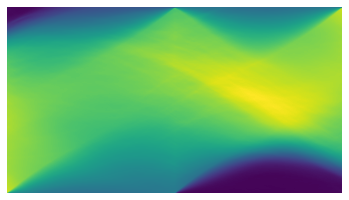

In [9]:
# Create sinograms on mammograms
path = '/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/website/static/images/mammograms'
os.chdir(path)
files = [f for f in os.listdir() if not 'sino' in f]
        
for f in files:
    print(f)
    image_transforms.sinogram(f)

In [15]:
## Explore some of the dark images
path = f'/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/data/Mammograms/{f2}/{f1}'
os.getcwd()

'/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/data/Mammograms/normals/CC'

'/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/data/Mammograms/malignant/MLO'

## Sample image to showcase cool transformations

(720, 400) (720, 400)


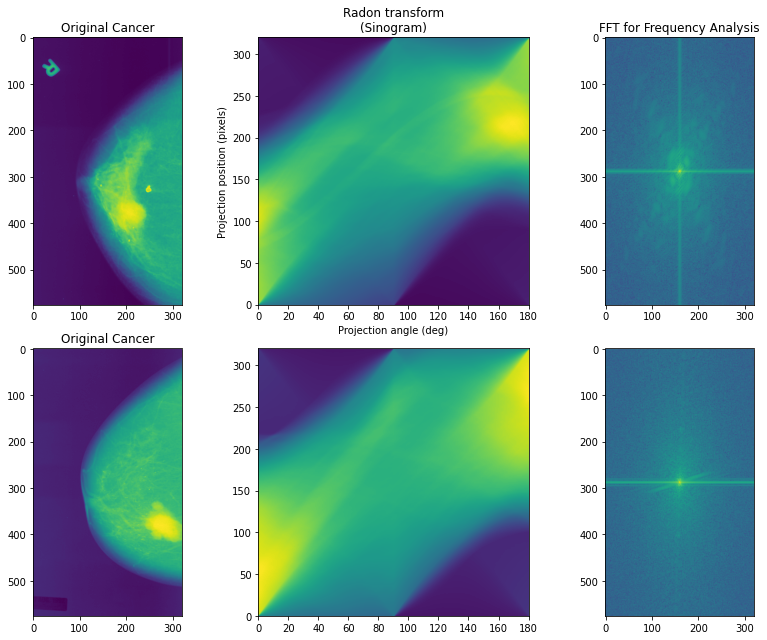

In [9]:
# import image as numpy array. Use Imageio

path = '/home/maureen/Documents/Galvanize/Capstone1/Capstone3/Cancer_Prediction/'
normal = 'cancer_B_3387_1.RIGHT_CC.png'#'D_4530_1.RIGHT_CC.jpg'#
malignant = 'cancer_C_0011_1.RIGHT_CC.png'#'cancer_A_1574_1.RIGHT_CC.png'
img1 = 'testimage4.jpg'

image1 = imageio.imread(normal).sum(axis=2) # for 3 channel images
image2 = imageio.imread(malignant).sum(axis=2)# for 3 channel images
print(image1.shape, image2.shape)

# Rescale
image1 = rescale(image1, scale=0.8, mode='reflect', multichannel=False)
image2 = rescale(image2, scale=0.8, mode='reflect', multichannel=False)

# Sinogram
theta = np.linspace(0., 180., max(image1.shape), endpoint=False)
sino1 = radon(image1, theta=theta, circle=True)
sino2 = radon(image2, theta=theta, circle=True)

# FFT with shift to get zero frequency at center
f = np.fft.fft2(image1)
f_shift = np.fft.fftshift(f)
fft1 = np.log(np.abs(f_shift))

f = np.fft.fft2(image2)
f_shift = np.fft.fftshift(f)
fft2 = np.log(np.abs(f_shift))


# Plot
fig, axes = plt.subplots(2, 3, figsize=(12, 9))

ax1 = axes[0,0]
ax1.set_title("Original Cancer")
ax1.imshow(image1)#, cmap=plt.cm.Greys_r)

ax2 = axes[0,1]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sino1,# cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sino1.shape[0]), aspect='auto')


ax = axes[0,2]
ax.set_title("FFT for Frequency Analysis")
ax.imshow(fft1)#, cmap=plt.cm.Greys_r)


ax = axes[1,0]
ax.set_title("Original Cancer")
ax.imshow(image2)#, cmap=plt.cm.Greys_r)

ax = axes[1,1]
ax.imshow(sino2,# cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sino2.shape[0]), aspect='auto')

ax = axes[1,2]
ax.imshow(fft2)#, cmap=plt.cm.Greys_r)

fig.tight_layout()
# plt.savefig('radon_fft_hist_2.png', dpi=350)
# plt.show()


In [11]:
imageio.imsave()

numpy.ndarray